In [1]:
import pandas as pd
import numpy as np

In [2]:
#WDW NON IAAPA.xlsx
#WDW NON IAAPA 1_3 ONLY.xlsx
#DLR NON IAAPA.xlsx
#DLR NON IAAPA 1_3 ONLY.xlsx

#WDW IAAPA Incident
#WDW IAAPA Incident ONLY 1_3
#DLR IAAPA Incident

In [3]:
WDWweather = pd.read_excel('WDW Weather.xlsx')
DLRweather = pd.read_excel('DLR Weather.xlsx')
WDWincident = pd.read_excel('WDW IAAPA Incident ONLY 1_3.xlsx')
DLRincident = pd.read_excel('DLR IAAPA Incident.xlsx')

In [4]:
wdw_weather = WDWweather
wdw_incident = WDWincident

In [5]:
wdw_weather["Date"] = pd.to_datetime(wdw_weather["Date"])
wdw_incident["Date of Incident/Loss"] = pd.to_datetime(wdw_incident["Date of Incident/Loss"])

In [6]:
start_date = "2022-10-1"
end_date = "2024-09-15"

wdw_weather = wdw_weather[
    (wdw_weather["Date"] >= start_date) & 
    (wdw_weather["Date"] <= end_date)]

In [7]:
wdw_incident = wdw_incident[
    (wdw_incident["Date of Incident/Loss"] >= start_date) & 
    (wdw_incident["Date of Incident/Loss"] <= end_date)]

In [8]:
wdw_incident.rename(columns={"Date of Incident/Loss": "Date"}, inplace=True)

C:\Users\gduln001\AppData\Local\Temp\1\ipykernel_26988\2661012959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdw_incident.rename(columns={"Date of Incident/Loss": "Date"}, inplace=True)


In [9]:
# Group by Date and count rows to get total incidents per day
daily_incidents = (
    wdw_incident
    .groupby("Date")
    .size()  # count how many incident rows occurred on that Date
    .reset_index(name="IncidentCount")
)

print(daily_incidents.head())

        Date  IncidentCount
0 2022-10-01              1
1 2022-10-05              1
2 2022-10-09              1
3 2022-10-12              1
4 2022-10-17              1


In [10]:
# Determine the overall min and max date across both DataFrames
combined_min_date = min(wdw_weather["Date"].min(), daily_incidents["Date"].min())
combined_max_date = max(wdw_weather["Date"].max(), daily_incidents["Date"].max())

# Create a daily date range
all_dates = pd.date_range(start=combined_min_date, end=combined_max_date, freq="D")

# Build a DataFrame of all those dates
all_days = pd.DataFrame({"Date": all_dates})

In [11]:
all_days = pd.merge(all_days, daily_incidents, on="Date", how="left")
all_days["IncidentCount"] = all_days["IncidentCount"].fillna(0)

In [12]:
wdw_weather["Maximum"] = pd.to_numeric(wdw_weather["Maximum"], errors="coerce")

C:\Users\gduln001\AppData\Local\Temp\1\ipykernel_26988\3800357853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdw_weather["Maximum"] = pd.to_numeric(wdw_weather["Maximum"], errors="coerce")


In [13]:
# Create a 'year_month' period for grouping
wdw_weather["year_month"] = wdw_weather["Date"].dt.to_period("M")

# Calculate mean daily maximum per year-month
monthly_avg_max = wdw_weather.groupby("year_month")["Maximum"].mean()

# Fill missing daily maxima with the monthly average
def fill_missing_max(row):
    if pd.isna(row["Maximum"]):
        return monthly_avg_max[row["year_month"]]
    else:
        return row["Maximum"]

wdw_weather["Maximum"] = wdw_weather.apply(fill_missing_max, axis=1)


C:\Users\gduln001\AppData\Local\Temp\1\ipykernel_26988\1280612615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdw_weather["year_month"] = wdw_weather["Date"].dt.to_period("M")
C:\Users\gduln001\AppData\Local\Temp\1\ipykernel_26988\1280612615.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdw_weather["Maximum"] = wdw_weather.apply(fill_missing_max, axis=1)


In [14]:
wdw_weather["Precipitation"] = pd.to_numeric(wdw_weather["Precipitation"], errors="coerce")

# If you want to treat missing precipitation as 0 (or fill with monthly avg), do so.
wdw_weather["Precipitation"] = wdw_weather["Precipitation"].fillna(0)

C:\Users\gduln001\AppData\Local\Temp\1\ipykernel_26988\123836852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdw_weather["Precipitation"] = pd.to_numeric(wdw_weather["Precipitation"], errors="coerce")
C:\Users\gduln001\AppData\Local\Temp\1\ipykernel_26988\123836852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdw_weather["Precipitation"] = wdw_weather["Precipitation"].fillna(0)


In [15]:
merged_df = pd.merge(
    all_days, 
    wdw_weather[["Date", "Maximum", "Precipitation"]], 
    on="Date", 
    how="left"
)

In [16]:
merged_df

,Date,IncidentCount,Maximum,Precipitation
0,2022-10-01,1.0,80.0,0.00
1,2022-10-02,0.0,86.0,0.00
2,2022-10-03,0.0,86.0,0.00
3,2022-10-04,0.0,84.0,0.00
4,2022-10-05,1.0,82.0,0.00
...,...,...,...,...
711,2024-09-11,0.0,90.0,1.78
712,2024-09-12,0.0,92.0,0.50
713,2024-09-13,0.0,90.0,0.00
714,2024-09-14,0.0,90.0,0.00


In [17]:
corr_matrix = merged_df[["IncidentCount", "Maximum", "Precipitation"]].corr()
print(corr_matrix)

               IncidentCount   Maximum  Precipitation
IncidentCount       1.000000  0.008963      -0.035725
Maximum             0.008963  1.000000       0.096348
Precipitation      -0.035725  0.096348       1.000000


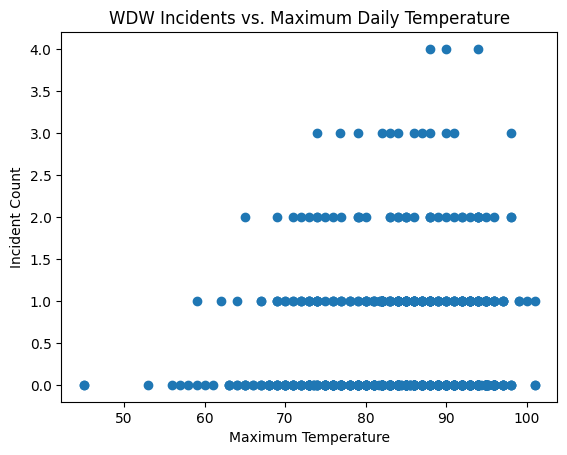

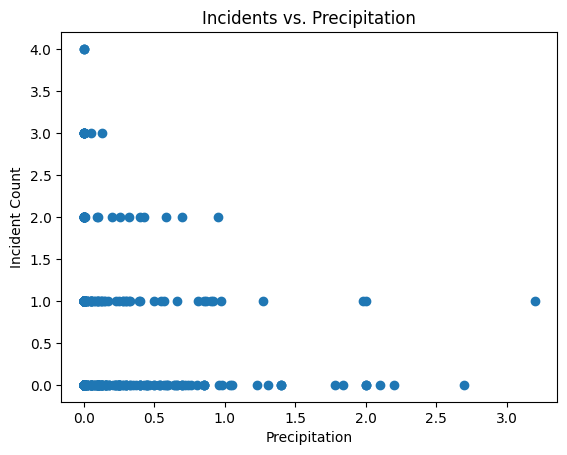

In [18]:
import matplotlib.pyplot as plt

# Scatterplot of Incidents vs. Max Temp
plt.scatter(merged_df["Maximum"], merged_df["IncidentCount"])
plt.title("WDW Incidents vs. Maximum Daily Temperature")
plt.xlabel("Maximum Temperature")
plt.ylabel("Incident Count")
plt.show()

# Scatterplot of Incidents vs. Precipitation
plt.scatter(merged_df["Precipitation"], merged_df["IncidentCount"])
plt.title("Incidents vs. Precipitation")
plt.xlabel("Precipitation")
plt.ylabel("Incident Count")
plt.show()


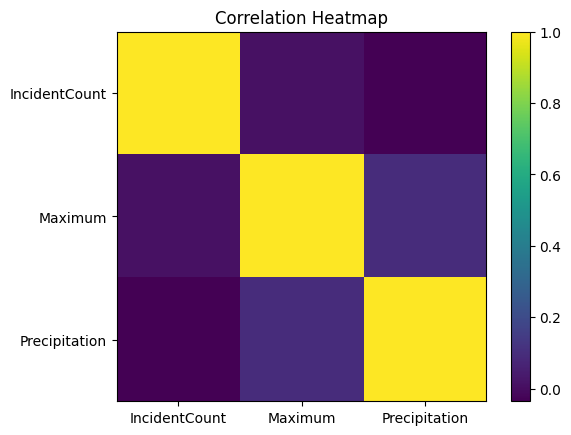

In [19]:
import matplotlib.pyplot as plt

corr_matrix = merged_df[["IncidentCount", "Maximum", "Precipitation"]].corr()

fig, ax = plt.subplots()  # One figure, one set of axes
cax = ax.imshow(corr_matrix)  # Basic heatmap of correlation matrix
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
plt.title("Correlation Heatmap")
plt.colorbar(cax)  # Show correlation scale
plt.show()


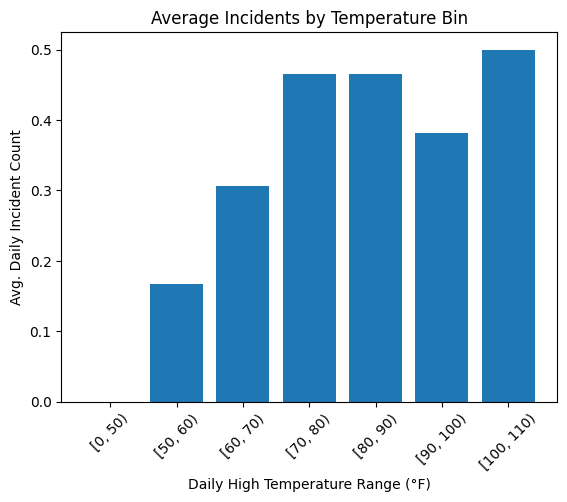

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define bins (adjust for your typical temperature range)
bins = [0, 50, 60, 70, 80, 90, 100, 110]

merged_df["TempBin"] = pd.cut(merged_df["Maximum"], bins=bins, right=False)

# Group by these temperature bins and compute the mean incident count
avg_incidents_by_bin = merged_df.groupby("TempBin")["IncidentCount"].mean()

# Make a bar chart
plt.bar(avg_incidents_by_bin.index.astype(str), avg_incidents_by_bin)
plt.title("Average Incidents by Temperature Bin")
plt.xlabel("Daily High Temperature Range (°F)")
plt.ylabel("Avg. Daily Incident Count")
plt.xticks(rotation=45)  # tilt x-labels a bit if needed
plt.show()


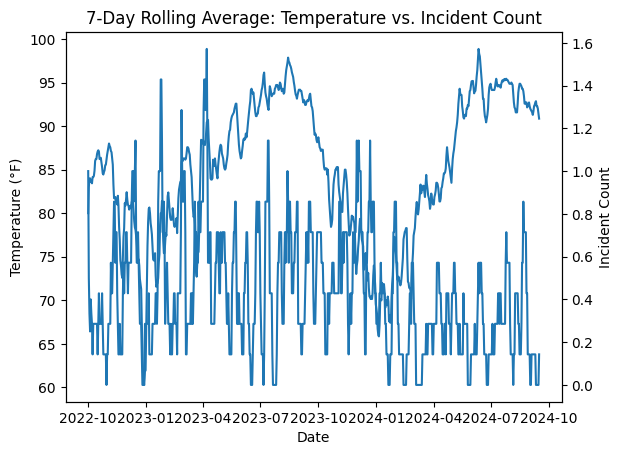

In [21]:
# Create 7-day rolling averages
merged_df = merged_df.sort_values("Date")  # Ensure data is sorted by date
merged_df["RollingTemp"] = merged_df["Maximum"].rolling(window=7, min_periods=1).mean()
merged_df["RollingIncidents"] = merged_df["IncidentCount"].rolling(window=7, min_periods=1).mean()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Plot rolling temperature on the first (left) y-axis
ax1.plot(merged_df["Date"], merged_df["RollingTemp"], label="7-Day Avg Temp")
ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature (°F)")

# Create a twin y-axis for incidents
ax2 = ax1.twinx()
ax2.plot(merged_df["Date"], merged_df["RollingIncidents"], label="7-Day Avg Incidents")
ax2.set_ylabel("Incident Count")

plt.title("7-Day Rolling Average: Temperature vs. Incident Count")
plt.show()


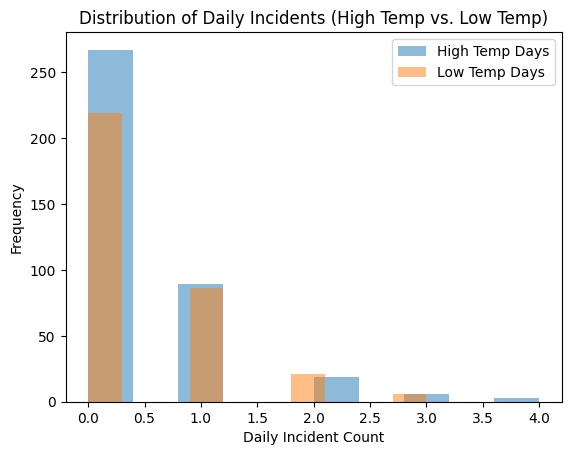

In [22]:
# Create a cutoff at the median temperature
temp_median = merged_df["Maximum"].median()

# Separate into two groups
high_temp_days = merged_df[merged_df["Maximum"] >= temp_median]
low_temp_days = merged_df[merged_df["Maximum"] < temp_median]

import matplotlib.pyplot as plt

# Histogram of incidents on high-temp days
plt.hist(high_temp_days["IncidentCount"], alpha=0.5, label="High Temp Days")
plt.hist(low_temp_days["IncidentCount"], alpha=0.5, label="Low Temp Days")
plt.title("Distribution of Daily Incidents (High Temp vs. Low Temp)")
plt.xlabel("Daily Incident Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()


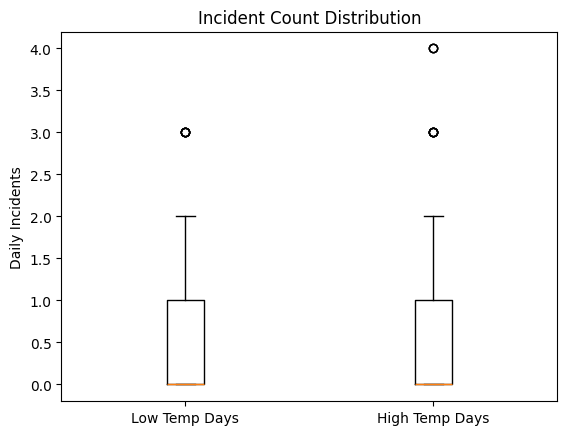

In [23]:
data_to_plot = [low_temp_days["IncidentCount"], high_temp_days["IncidentCount"]]

import matplotlib.pyplot as plt

plt.boxplot(data_to_plot, labels=["Low Temp Days", "High Temp Days"])
plt.title("Incident Count Distribution")
plt.ylabel("Daily Incidents")
plt.show()


In [24]:
pd.set_option('display.max_rows', None)
merged_df


,Date,IncidentCount,Maximum,Precipitation,TempBin,RollingTemp,RollingIncidents
0,2022-10-01,1.0,80.000000,0.00,"[80, 90)",80.000000,1.000000
1,2022-10-02,0.0,86.000000,0.00,"[80, 90)",83.000000,0.500000
2,2022-10-03,0.0,86.000000,0.00,"[80, 90)",84.000000,0.333333
3,2022-10-04,0.0,84.000000,0.00,"[80, 90)",84.000000,0.250000
4,2022-10-05,1.0,82.000000,0.00,"[80, 90)",83.600000,0.400000
5,2022-10-06,0.0,84.000000,0.00,"[80, 90)",83.666667,0.333333
6,2022-10-07,0.0,82.000000,0.00,"[80, 90)",83.428571,0.285714
7,2022-10-08,0.0,85.000000,0.00,"[80, 90)",84.142857,0.142857
8,2022-10-09,1.0,86.000000,0.00,"[80, 90)",84.142857,0.285714
9,2022-10-10,0.0,87.000000,0.00,"[80, 90)",84.285714,0.285714


In [25]:
merged_df["HasIncident"] = (merged_df["IncidentCount"] > 0).astype(int)
import statsmodels.formula.api as smf

model = smf.logit(formula="HasIncident ~ Maximum", data=merged_df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.627787
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            HasIncident   No. Observations:                  716
Model:                          Logit   Df Residuals:                      714
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Mar 2025   Pseudo R-squ.:               8.403e-06
Time:                        16:04:08   Log-Likelihood:                -449.50
converged:                       True   LL-Null:                       -449.50
Covariance Type:            nonrobust   LLR p-value:                    0.9307
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8141      0.763     -1.067      0.286      -2.310       0.682
Maximum        0.0008      0.